# Data exploration

In [1]:
# Set code path
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'code')))

## Preprocess data

In [2]:
import numpy as np
import pandas as pd
from preprocess import get_preprocessed_data
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = get_preprocessed_data(data_file_name="../data/cis2080.csv", labels_file_name="../metadata/descriptive_var_names.json")

In [4]:
data.to_pickle("../data/preprocessed_data.pickle")

## Functions

In [5]:
def print_num_responses(var):
    n_responses = len(var) - sum(var.isna())
    print(str(n_responses) + " responses out of " + str(len(var)) + " interviewed people.")

## Explore

In [6]:
with open("../metadata/descriptive_var_names.json") as f:
    var_names = json.load(f)

for key, value in var_names.items():
  if (value["description"] != "incomplete"):
    print(value["name"])

region
population
cigarettes
cigars
drink_loc1
drink_loc2
political_espectrum
sex
age
income
day
month
year
education_level
occupation
sector
socioeconomic_condition
status


In [7]:
data.region.value_counts(dropna=False)

Murcia                   1621
Andalusia                1354
Catalonia                1317
Vasque Country           1298
Madrid                   1215
Community of Valencia    1115
Galicia                  1039
Castilla y Leon          1021
Castilla - La Mancha      938
Canary Islands            920
Aragon                    903
Extremadura               888
Asturias                  800
Balearic Islands          800
Cantabria                 800
La Rioja                  796
Navarre                   791
Name: region, dtype: int64

### Population

In [8]:
data.population.describe()

count    1.759800e+04
mean     2.870503e+05
std      6.089171e+05
min      1.000000e+03
25%      6.000000e+03
50%      3.000000e+04
75%      2.500000e+05
max      2.500000e+06
Name: population, dtype: float64

In [9]:
data.population.isna().sum()

18

### Smoking

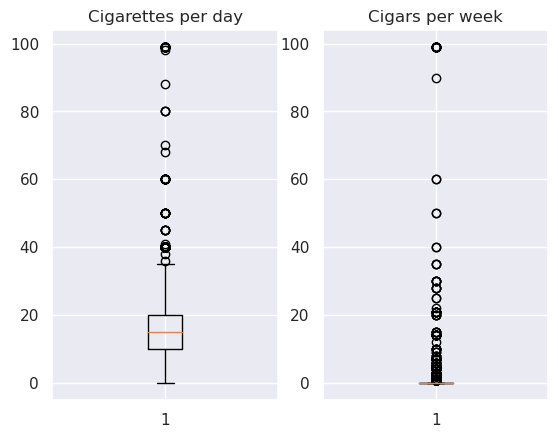

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(data["cigarettes"].dropna())
ax1.set_title("Cigarettes per day")
ax2.boxplot(data["cigars"].dropna())
ax2.set_title("Cigars per week")
plt.show()

In [11]:
print("Cigarettes NAs: " + str(sum(data.cigarettes.isna()/len(data))))
print("Cigars NAs: " + str(sum(data.cigars.isna()/len(data))))

Cigarettes NAs: 0.6485581289737434
Cigars NAs: 0.6519073569483149


### Drinking locations

In [12]:
loc1 = pd.DataFrame({"location" : data.drink_loc1, "preference" : 1})
loc2 = pd.DataFrame({"location" : data.drink_loc2, "preference" : 2})
locs = pd.concat([loc1, loc2])

<AxesSubplot:xlabel='count', ylabel='location'>

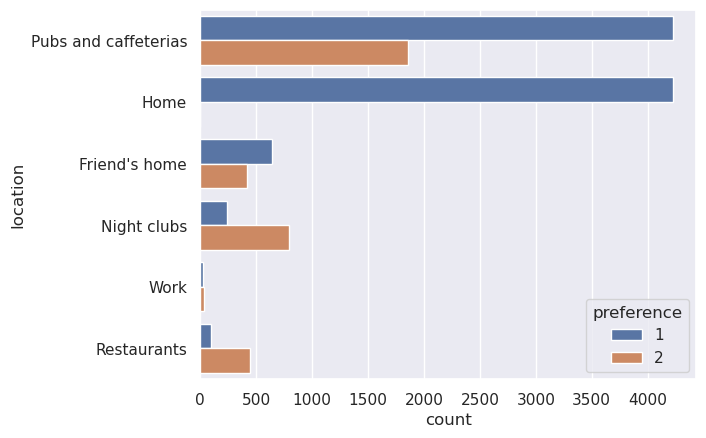

In [13]:
sns.countplot(data=locs, y="location", hue="preference")

### political_espectrum

11697 responses out of 17616 interviewed people.


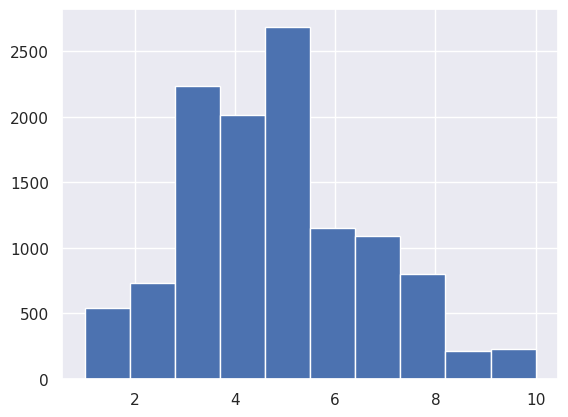

In [14]:
data.political_espectrum.hist()
print_num_responses(data.political_espectrum)

### age

17576 responses out of 17616 interviewed people.


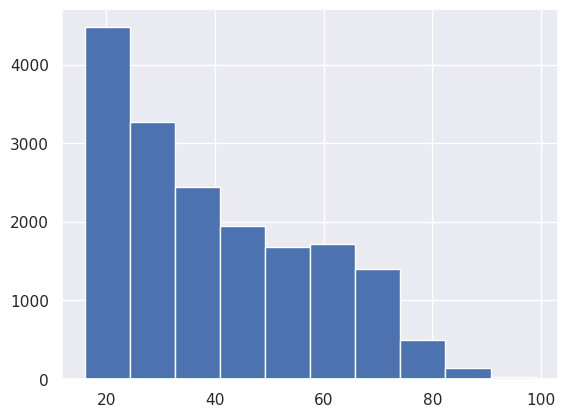

In [15]:
data.age.hist()
print_num_responses(data.age)

### income

count    1.759800e+04
mean     2.870503e+05
std      6.089171e+05
min      1.000000e+03
50%      3.000000e+04
80%      2.500000e+05
90%      7.000000e+05
95%      2.500000e+06
max      2.500000e+06
Name: population, dtype: float64
17598 responses out of 17616 interviewed people.


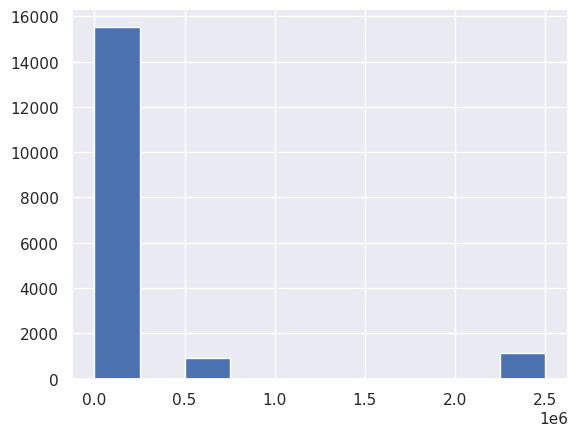

In [16]:
print(data.population.describe(percentiles=[0.5, 0.8, 0.9, 0.95]))
data.population.hist()
print_num_responses(data.population)

### occupation

17509 responses out of 17616 interviewed people.


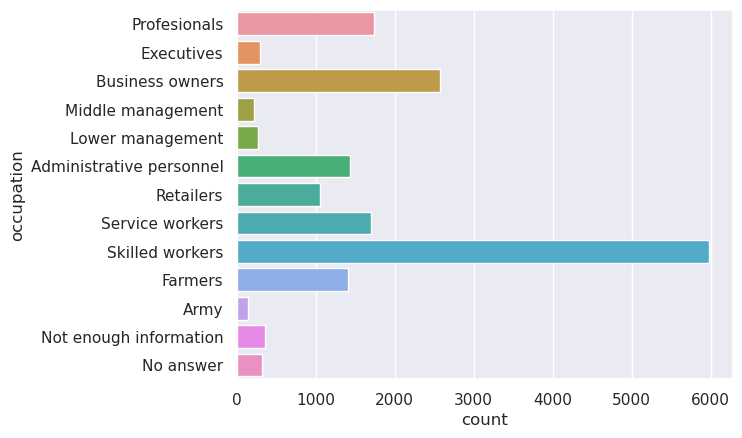

In [17]:
sns.countplot(data=data, y="occupation")
print_num_responses(data.occupation)

### socioeconomic_condition

Socioeconomic Condition is calculated by INE from occupation, activity and laboral status. See [INE glosary](
https://www.ine.es/censo_accesible/es/glosario.html) for more information.

INE also uses the variables "Average Socioeconomic Condition" and "Reference person in household socioeconomic condition", althought this pool only labeled the variable as "Socioeconomic condition".

17616 responses out of 17616 interviewed people.


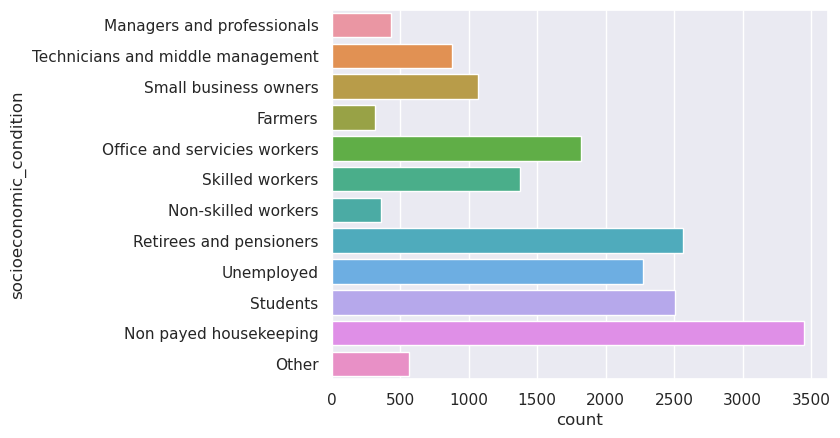

In [18]:
sns.countplot(data=data, y="socioeconomic_condition")
print_num_responses(data.socioeconomic_condition)

2489 responses out of 2505 interviewed people.


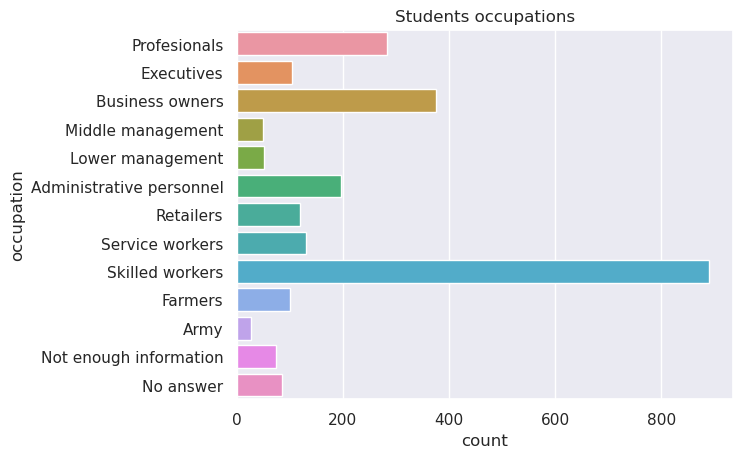

In [19]:
subdata = data.query("socioeconomic_condition == 'Students'")
sns.countplot(data=subdata, y="occupation").set(title="Students occupations")
print_num_responses(subdata.occupation)

3424 responses out of 3449 interviewed people.


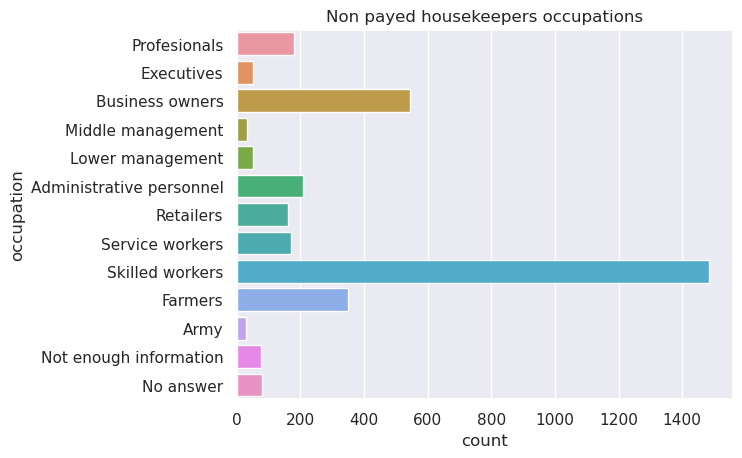

In [20]:
subdata = data.query("socioeconomic_condition == 'Non payed housekeeping'")
sns.countplot(data=subdata, y="occupation").set(title="Non payed housekeepers occupations")
print_num_responses(subdata.occupation)

### sex

In [21]:
data.sex.value_counts(dropna=False)

female    9016
male      8576
NaN         24
Name: sex, dtype: int64

### education_level

17616 responses out of 17616 interviewed people.


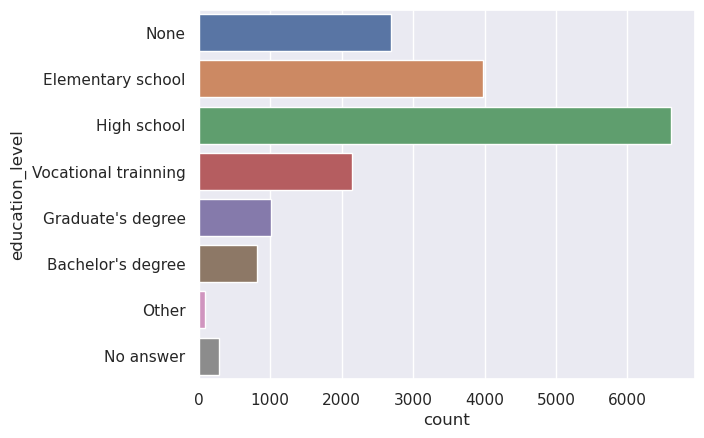

In [22]:
sns.countplot(data=data, y="education_level")
print_num_responses(data.education_level)

### sector

17490 responses out of 17616 interviewed people.


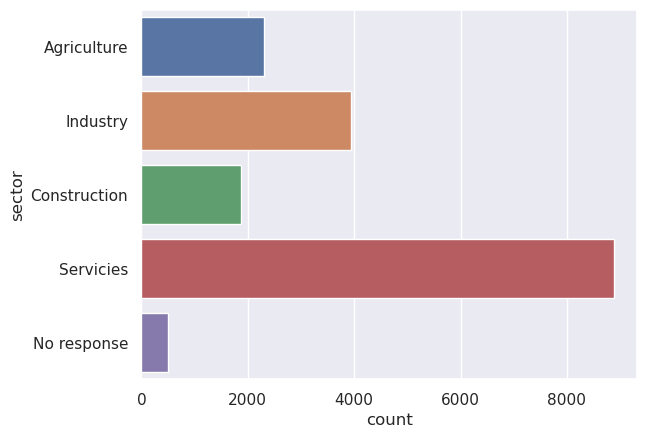

In [23]:
sns.countplot(data=data, y="sector")
print_num_responses(data.sector)

### status

17616 responses out of 17616 interviewed people.


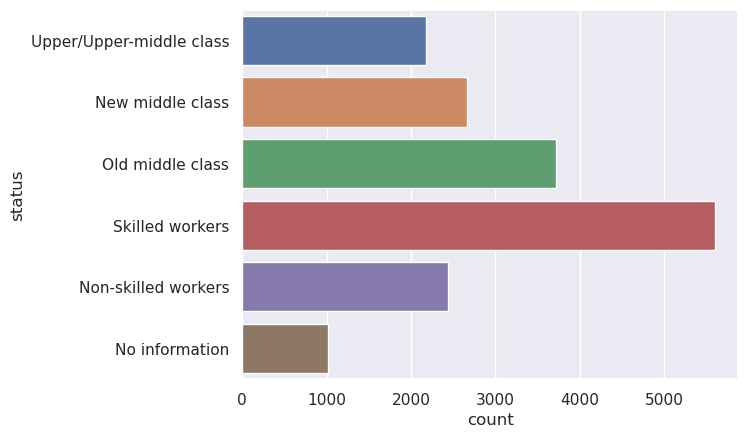

In [24]:
sns.countplot(data=data, y="status")
print_num_responses(data.status)

### UBEs

<AxesSubplot:>

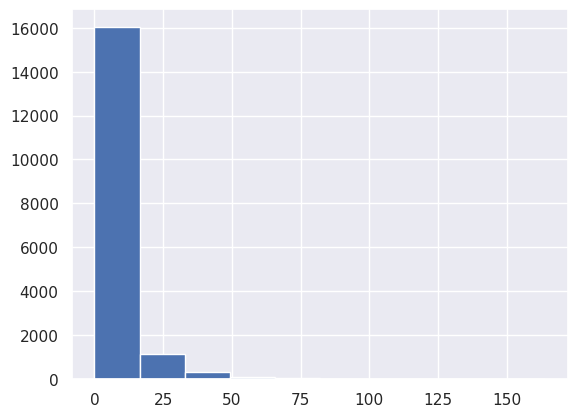

In [25]:
data.UBE.hist()

<AxesSubplot:>

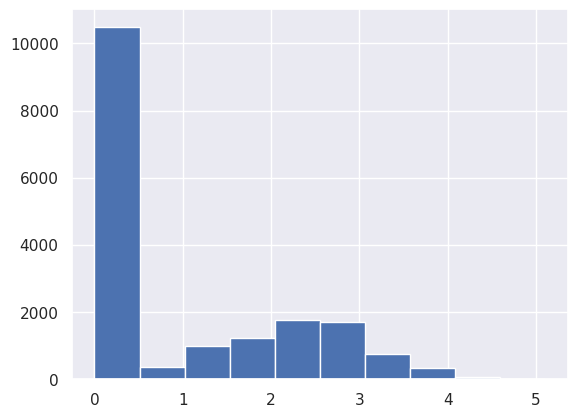

In [26]:
np.log1p(data.UBE).hist()

<AxesSubplot:>

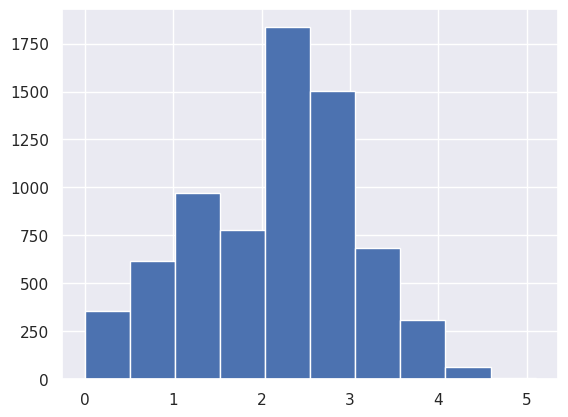

In [27]:
np.log(data.query("UBE > 0").UBE).hist()

In [28]:
print("Most people who drink take around " + str(round(np.exp(2), 2)) +
        " UBEs from thursday to sunday.")

Most people who drink take around 7.39 UBEs from thursday to sunday.


### Factor plot sex, age, UBE

Age vs UBE vs sex is the most revealing.

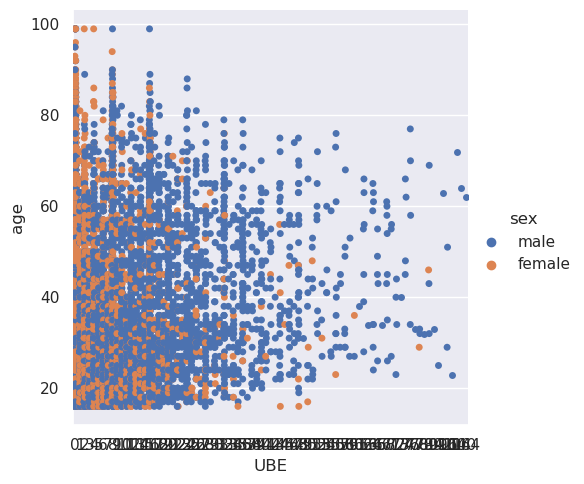

In [29]:
sns.catplot(x="UBE", y="age", hue="sex", data=data)

For income, we filter outliers of more than 100 UBEs in the 3 measured days.

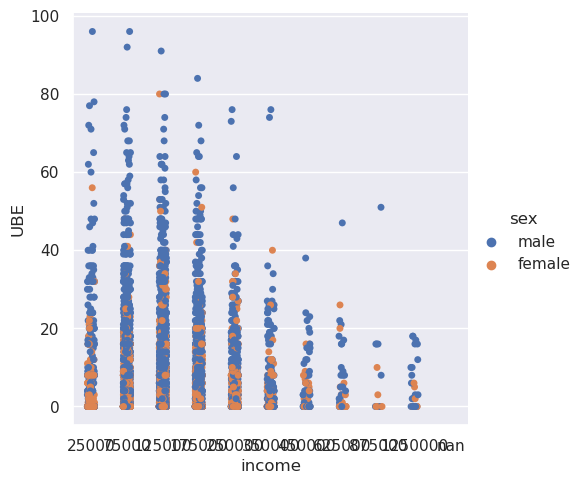

In [30]:
sns.catplot(x="income", y="UBE", hue="sex", data=data.query("UBE < 100"))

Do people who earn more drink less? Or are they just a smaller group? Keep in mind that points get overlaped in these plots.

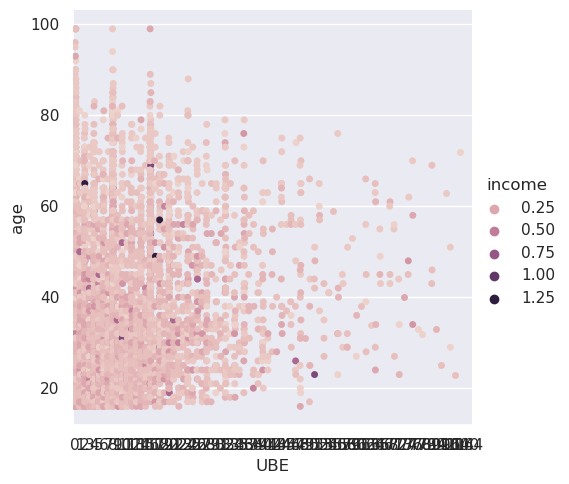

In [31]:
sns.catplot(x="UBE", y="age", hue="income", data=data)